importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

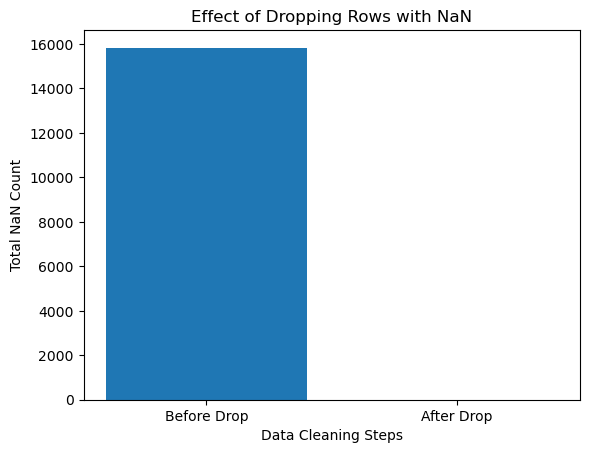

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


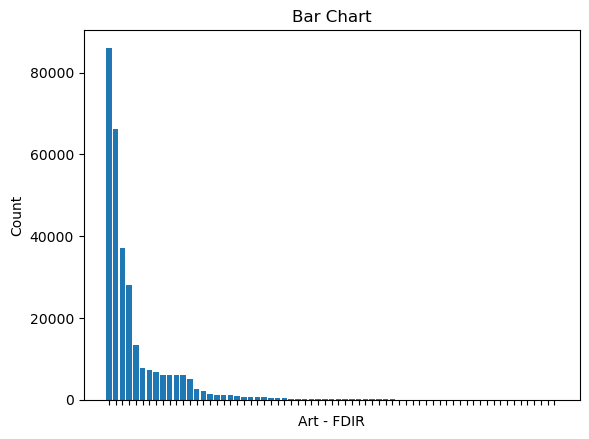

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


In [2]:
import import_ipynb
from preprocess import df
df.head()

In [3]:
#Importere og bruke tensorflow og keras for dyp læring
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [4]:
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]
y = df['Hovedart FAO']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
from tensorflow.keras.utils import to_categorical
labels_one_hot = to_categorical(y_train)
labels_one_hot_test = to_categorical(y_test)


In [5]:
#Build the Model
model = tf.keras.models.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=[len(features)]),
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(5, activation='softmax')  # Change to 'softmax' for multi-class problems
])

In [6]:
import visualkeras
visualkeras.layered_view(model, to_file='model_visualization.png').show()  # saves the visualization as a PNG file and shows it

In [7]:
#Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Train og fit.
model.fit(X_train, labels_one_hot, epochs=10, validation_data=(X_test, labels_one_hot_test))

Epoch 1/10
1683/1683 [==============================] - 3s 2ms/step - loss: 0.5448 - accuracy: 0.7837 - val_loss: 0.4269 - val_accuracy: 0.8260
Epoch 2/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8270 - val_loss: 0.3731 - val_accuracy: 0.8489
Epoch 3/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3985 - accuracy: 0.8372 - val_loss: 0.3733 - val_accuracy: 0.8470
Epoch 4/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8451 - val_loss: 0.3641 - val_accuracy: 0.8450
Epoch 5/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3669 - accuracy: 0.8499 - val_loss: 0.3538 - val_accuracy: 0.8527
Epoch 6/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3606 - accuracy: 0.8538 - val_loss: 0.3343 - val_accuracy: 0.8610
Epoch 7/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.8558 - val_loss: 0.3353 - val_accuracy:

The output tells us how the model's loss and accuracy change over training epochs, as well as how well it performs on both the validation and test datasets. Overall, the decreasing loss and increasing accuracy suggest that the model is learning and improving its performance as it trains.

In [9]:
test_loss, test_acc = model.evaluate(X_test, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 0s - loss: 0.3256 - accuracy: 0.8667 - 172ms/epoch - 408us/step
Test accuracy: 0.8666518330574036
